In [171]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from fiona.crs import from_epsg
from shapely.geometry import Point

In [172]:
map_path= r"M:\NY4P Metrics Research 18034\05_GRAPHICS\Maps"
graph_path= r"M:\NY4P Metrics Research 18034\05_GRAPHICS\Charts Graphs Diagrams" 

In [173]:
parks= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\NYC_PARKS_DATA\NYCPARKS_ALLSITES.shp")

In [174]:
ntas= gpd.read_file(r"S:\NYC_GIS_DATA\DCP Neighborhood Tabulation Areas\nynta.shp")

In [175]:
cds= gpd.read_file(r"S:\NYC_GIS_DATA\community districts\nycd.shp")

In [176]:
tracts= gpd.read_file(r"S:\NYC_GIS_DATA\census_tracts_2010\nyct2010.shp",dtype={'Id2':str})

In [177]:
path_parks= r'M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\Parks Events Listing\190513_download'

In [178]:
event= pd.read_csv(join(path_parks, 'NYC_Parks_Events_Listing___Event_Listing.csv'))
orgs= pd.read_csv(join(path_parks, 'NYC_Parks_Events_Listing___Event_Organizers.csv'))
loc= pd.read_csv(join(path_parks, 'NYC_Parks_Events_Listing___Event_Locations.csv'))
cats= pd.read_csv(join(path_parks, 'NYC_Parks_Events_Listing___Event_Categories.csv'))

In [179]:
parks.sort_values('GISPROPNUM').head(100)

,GISPROPNUM,LOCATION,COMMUNITYB,COUNCILDIS,PRECINCT,ZIPCODE,BOROUGH,ACRES,ADDRESS,SIGNNAME,TYPECATEGO,WATERFRONT,NYS_ASSEMB,NYS_SENATE,US_CONGRES,geometry
330,B001,Franklin St. bet. Milton St. and Noble St.,301,33,94,11222,B,0.896,81 FRANKLIN STREET,American Playground,Playground,No,50,26,12,"POLYGON ((996030.5157970488 204702.458755061, ..."
331,B002,"E. 38 St., E. 38 St. bet. Ave. I and Ave. J",318,45,63,11210,B,3.557,1041 EAST 38 STREET,Amersfort Park,Neighborhood Park,No,41,21,9,"POLYGON ((1001309.692246556 167940.4971741438,..."
949,B003,"Prospect Park W., 15 St.",355,39,78,11215,B,1.711,None,Bartel-Pritchard Square,Triangle/Plaza,No,44,21,9,"POLYGON ((989835.9222151339 180031.9739753902,..."
1104,B006,"Broadway, Stuyvesant Ave., Vernon Ave.",303,36,81,11221,B,0.012,None,Beattie Square,Triangle/Plaza,No,54,18,8,"POLYGON ((1002418.263520226 193004.5254580528,..."
1495,B007,Cropsey Ave. bet. 21 Ave. and Bay Pkwy.,311,43,62,11214,B,17.500,2122 CROPSEY AVENUE,Bensonhurst Park,Recreation Field/Courts,Yes,"46, 47",23,11,(POLYGON ((984193.6730009764 156584.5612246394...
647,B008,"Blake Ave., Dumont Ave., Livonia Ave. bet. Str...",316,41,73,11212,B,10.555,"245 DUMONT AVENUE, 167 LIVONIA AVENUE",Betsy Head Park,Community Park,No,55,"20, 19",9,(POLYGON ((1008694.898276642 180553.8016718924...
338,B010,"Washington Ave., Flatbush Ave. bet. Eastern Pk...","309, 308",35,78,11238,B,47.570,1000 WASHINGTON AV,Brooklyn Botanic Garden,Buildings/Institutions,No,57,21,9,"(POLYGON ((993859.98634547 184161.5611886382, ..."
648,B012,"St. Mark's Ave., Park Pl. bet. Brooklyn Ave. a...",308,36,77,11213,B,7.047,195 BROOKLYN AVENUE,Brower Park,Neighborhood Park,No,43,25,9,"POLYGON ((1000087.939768806 185098.5744064748,..."
332,B016,"Irving Ave., Kinickerbocker Ave. bet. Starr St...",304,34,83,11237,B,6.873,64 IRVING AVENUE,Maria Hernandez Park,Neighborhood Park,No,53,18,7,"POLYGON ((1005734.744420052 195594.8765765578,..."
333,B017,Knickerbocker Ave. bet. Woodbine St. and Putna...,304,37,83,11237,B,2.783,617 KNICKERBOCKER AVENUE,Bushwick Playground,Jointly Operated Playground,No,54,18,7,"POLYGON ((1008639.052915886 193055.5371670574,..."


In [180]:
parks.crs

{'init': 'epsg:2263'}

In [181]:
parks['TYPECATEGO'].value_counts()

Triangle/Plaza                 338
Neighborhood Park              267
Jointly Operated Playground    263
Playground                     240
Community Park                 105
Nature Area                     84
Recreation Field/Courts         71
Strip                           68
Undeveloped                     62
Parkway                         43
Mall                            34
Tracking                        34
Buildings/Institutions          22
Waterfront Facility             18
Flagship Park                   16
Managed Sites                   15
Cemetery                        12
Historic House Park             12
Lot                              5
Name: TYPECATEGO, dtype: int64

In [707]:
event2= pd.merge(event, loc, on='event_id', how='left')
event2.head()

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,...,url,notice,name,park_id,lat,long,address,zip,borough,accessible
0,76690,Open Hours: Hallett Nature Sanctuary,10/29/2013,13:00,15:00,NaN,Normally closed to visitors except on guided t...,Normally closed to visitors except on guided t...,(212) 360-1461,hlook@centralparknyc.org,...,open-hours-hallett-nature-sanctuary,0,Hallett Nature Sanctuary,M010,40.765701,-73.976097,NaN,NaN,M,1.0
1,149886,Paper Arts and Crafts,08/19/2017,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,...,paper-arts-and-crafts,0,Poe Park Visitor Center,X040,40.865002,-73.894699,2640 Grand Concourse,NaN,X,1.0
2,143835,It's My Park at Herbert Von King Park - Spring...,04/22/2017,08:00,12:00,NaN,<p>Please note: this event time was originally...,Volunteers will spruce up playground equipment...,(917) 297-2365,wmdkaos@aol.com,...,its-my-park-at-herbert-von-king-park-spring-cl...,0,Herbert Von King Cultural Arts Center,B088,40.689899,-73.946701,670 Lafayette Avenue,11216.0,B,1.0
3,162696,Summer on the Hudson: Yoga Flow,08/30/2018,18:30,19:30,NaN,<p>Link mindful breath with movement in this f...,Link mindful breath with movement in this full...,311,summeronthehudson@gmail.com,...,summer-on-the-hudson-yoga-flow,0,Lawn at 74th Street,M353,40.781961,-73.985494,NaN,NaN,M,1.0
4,164892,It's My Park at William Sheridan Playground,05/06/2018,10:00,14:00,NaN,"<p>This It&#39;s My Park season, volunteer wit...",Volunteer with Friends of William Sheridan to ...,NaN,delancey.nelson@parks.nyc.gov,...,its-my-park-at-william-sheridan-playground,0,William Sheridan Playground,B124,40.715062,-73.964118,NaN,NaN,B,NaN


In [183]:
event2['geometry']= [Point(p) for p in event2[['long', 'lat']].itertuples(index=False)]

In [184]:
event2= gpd.GeoDataFrame(event2, crs=from_epsg(4326))

In [185]:
event2.crs
event2= event2.to_crs(epsg=2263)

In [186]:
event2.head()

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,...,notice,name,park_id,lat,long,address,zip,borough,accessible,geometry
0,76690,Open Hours: Hallett Nature Sanctuary,10/29/2013,13:00,15:00,NaN,Normally closed to visitors except on guided t...,Normally closed to visitors except on guided t...,(212) 360-1461,hlook@centralparknyc.org,...,0,Hallett Nature Sanctuary,M010,40.765701,-73.976097,NaN,NaN,M,1.0,POINT (990871.2821305585 218243.2837263702)
1,149886,Paper Arts and Crafts,08/19/2017,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,...,0,Poe Park Visitor Center,X040,40.865002,-73.894699,2640 Grand Concourse,NaN,X,1.0,POINT (1013375.649317923 254438.582607902)
2,143835,It's My Park at Herbert Von King Park - Spring...,04/22/2017,08:00,12:00,NaN,<p>Please note: this event time was originally...,Volunteers will spruce up playground equipment...,(917) 297-2365,wmdkaos@aol.com,...,0,Herbert Von King Cultural Arts Center,B088,40.689899,-73.946701,670 Lafayette Avenue,11216.0,B,1.0,POINT (999031.0151938059 190629.9053739559)
3,162696,Summer on the Hudson: Yoga Flow,08/30/2018,18:30,19:30,NaN,<p>Link mindful breath with movement in this f...,Link mindful breath with movement in this full...,311,summeronthehudson@gmail.com,...,0,Lawn at 74th Street,M353,40.781961,-73.985494,NaN,NaN,M,1.0,POINT (988267.384874076 224166.7720662239)
4,164892,It's My Park at William Sheridan Playground,05/06/2018,10:00,14:00,NaN,"<p>This It&#39;s My Park season, volunteer wit...",Volunteer with Friends of William Sheridan to ...,NaN,delancey.nelson@parks.nyc.gov,...,0,William Sheridan Playground,B124,40.715062,-73.964118,NaN,NaN,B,NaN,POINT (994197.1683949503 199794.7780903989)


In [187]:
parks.head()
parks['park_id']=parks['GISPROPNUM']
event3= event2.drop(['geometry'],axis=1)

In [188]:
parkjoin= parks.merge(event3,on='park_id')

In [189]:
type(parkjoin)

geopandas.geodataframe.GeoDataFrame

In [190]:
parktable= parkjoin.groupby(['TYPECATEGO','park_id']).agg({"event_id":'count'})
typetable= parkjoin.groupby(['TYPECATEGO']).agg({"event_id":'count'})

In [191]:
typetable.rename(columns={'event_id':'Count of Events'},inplace=True)
typetable

,Count of Events
TYPECATEGO,
Buildings/Institutions,1555
Cemetery,11
Community Park,14863
Flagship Park,15867
Historic House Park,4999
Jointly Operated Playground,613
Mall,6
Managed Sites,454
Nature Area,4777


In [192]:
parktypes= parkjoin['TYPECATEGO'].unique().tolist()

In [193]:
typetable['Count of Events']= typetable['Count of Events']/typetable['Count of Events'].sum()

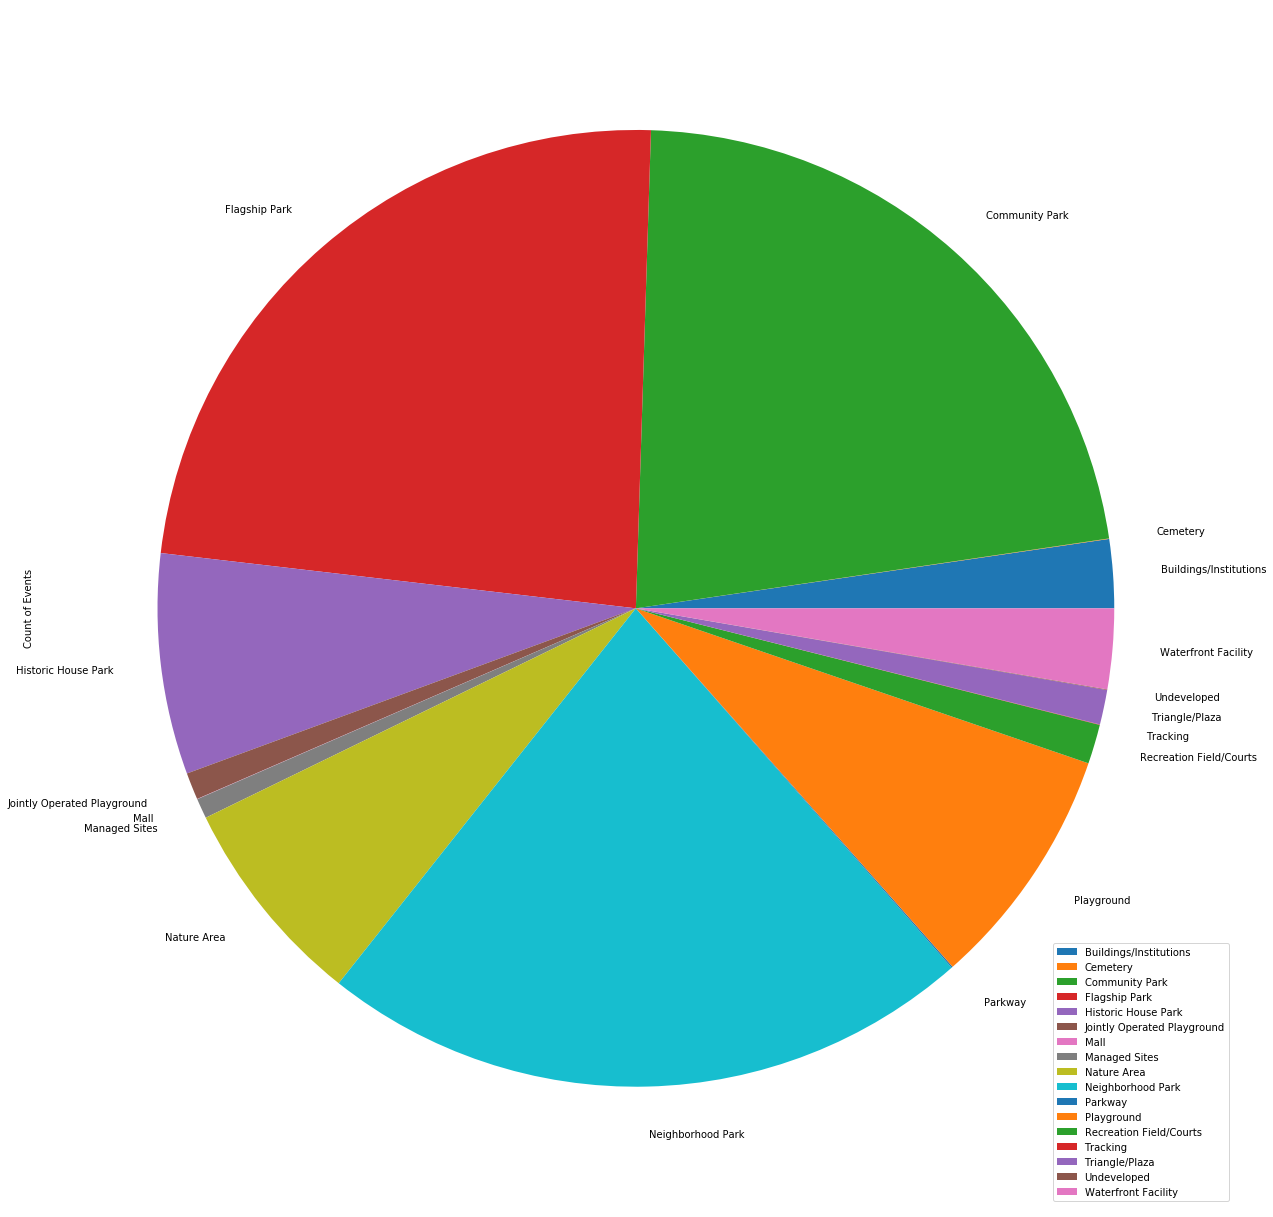

In [194]:
typetable.plot.pie(y=0)
plt.legend(loc='lower right')
fig= plt.gcf()
fig.set_size_inches(22,22)
plt.savefig(join(graph_path,'eventsbyparktype.pdf'))

In [195]:
majtypes= typetable[typetable['Count of Events']>0.01] #Arbitrary percentage threshold

In [196]:
majtypesl= majtypes.index.tolist()

In [197]:
selpark= parkjoin[parkjoin['TYPECATEGO'].isin(majtypesl)]

In [198]:
selparkcount= selpark.groupby('park_id').agg({"event_id":'count'})
selparkcount.rename(columns={'event_id':'Count of Events'} ,inplace=True);

In [199]:
selpark2= selpark.merge(selparkcount,on='park_id');
selparkcount.head()

,Count of Events
park_id,
B001,2
B002,16
B003,51
B007,7
B008,34


In [200]:
selpark2.duplicated('park_id').head()

0    False
1     True
2     True
3     True
4     True
dtype: bool

In [201]:
selpark3= selpark2[~selpark2.duplicated('park_id')]

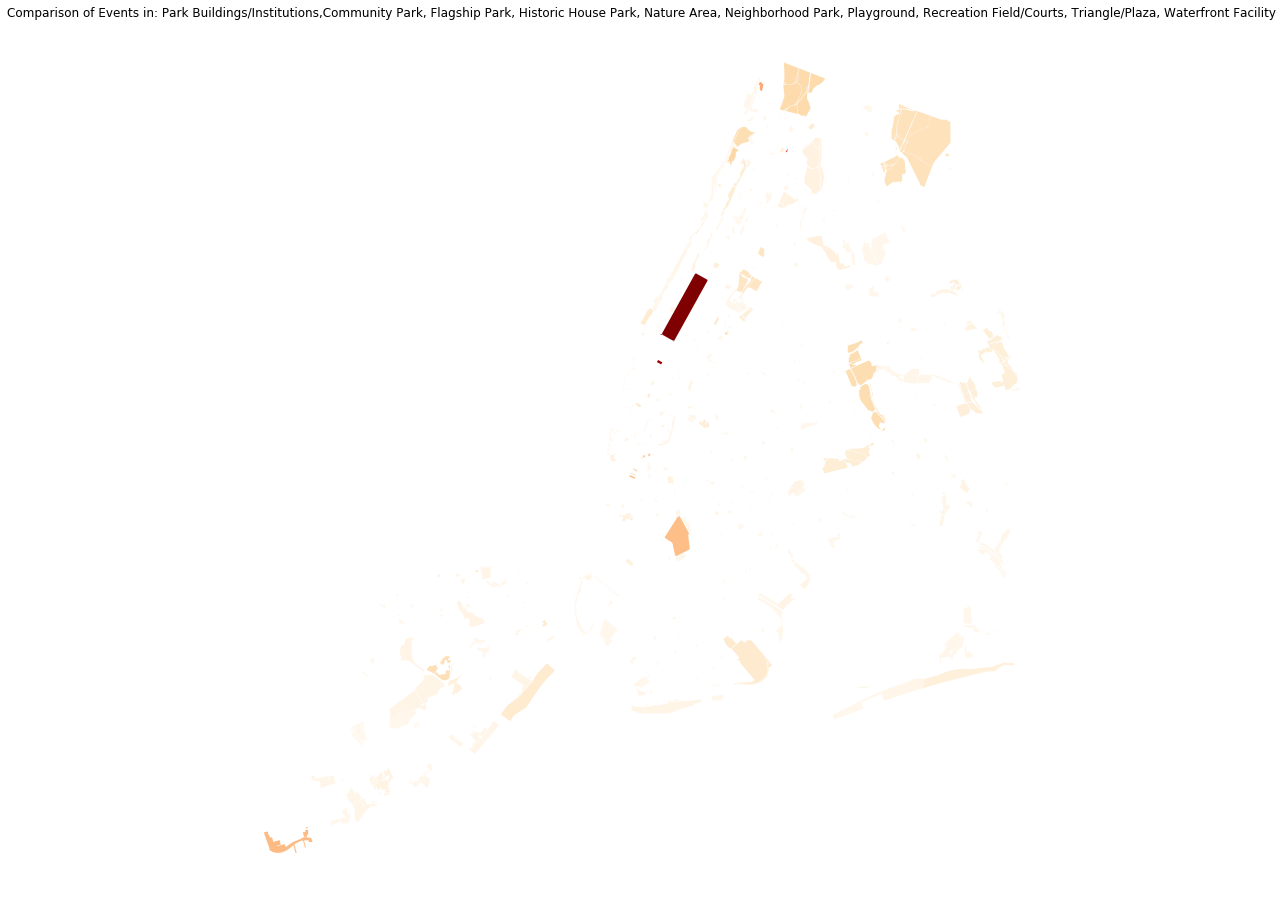

In [202]:
selpark3.plot(column='Count of Events',cmap='OrRd',figsize=(16,16))
plt.axis('off')
plt.title('Comparison of Events in: Park Buildings/Institutions,\
Community Park, Flagship Park, Historic House Park, Nature Area, \
Neighborhood Park, Playground, Recreation Field/Courts, Triangle/Plaza, Waterfront Facility')
plt.savefig(join(map_path,'parksbyeventnum.pdf'));

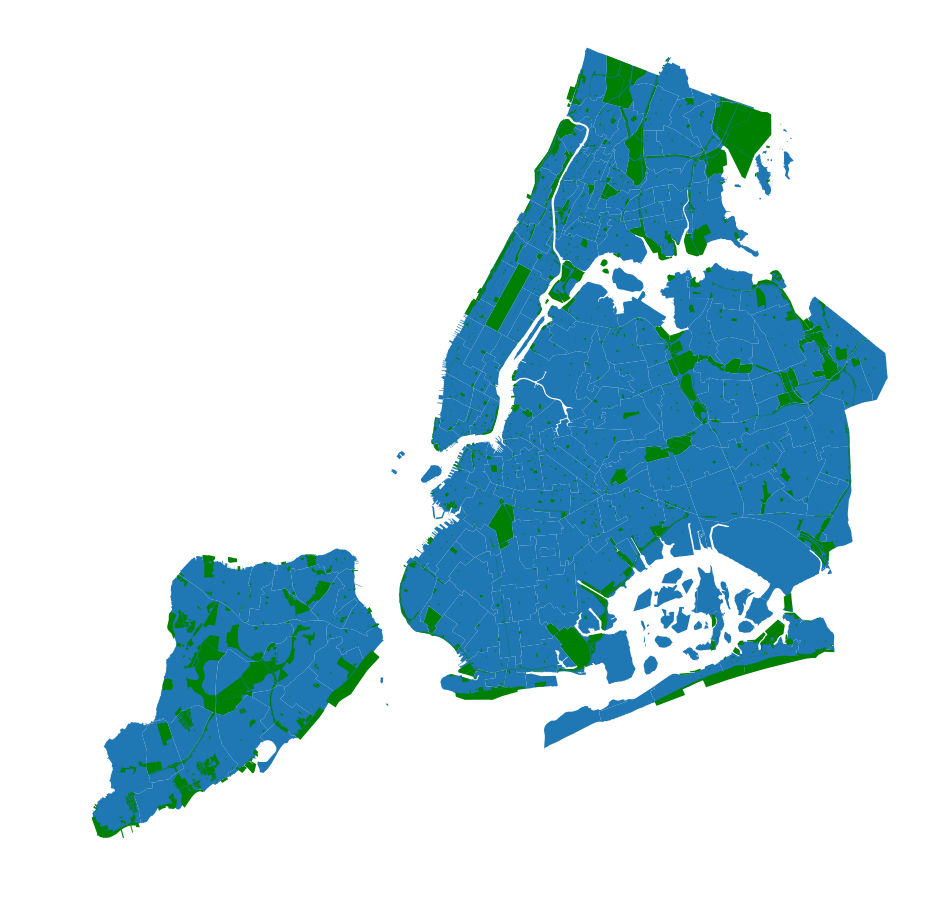

In [203]:
base= ntas.plot(figsize=(16,16))
parks.plot(ax=base,color='green') 
plt.axis('off')
plt.show();

# Park Joins to Political Geographies

Parks joined to NTAS

In [604]:
parkntasint= gpd.sjoin(parks,ntas,how='left',op='intersects')

In [605]:
parkntasint.head()

,GISPROPNUM,LOCATION,COMMUNITYB,COUNCILDIS,PRECINCT,ZIPCODE,BOROUGH,ACRES,ADDRESS,SIGNNAME,...,geometry,park_id,index_right,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area
0,Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...","401, 402",26,114,11101,Q,20.340,40-50 VERNON BOULEVARD,Queensbridge Park,...,"(POLYGON ((998639.7287544757 214672.844326064,...",Q104,77,4,Queens,081,QN31,Hunters Point-Sunnyside-West Maspeth,74604.551860,1.024000e+08
0,Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...","401, 402",26,114,11101,Q,20.340,40-50 VERNON BOULEVARD,Queensbridge Park,...,"(POLYGON ((998639.7287544757 214672.844326064,...",Q104,38,4,Queens,081,QN68,Queensbridge-Ravenswood-Long Island City,27071.612922,2.331282e+07
1,X253,City Island Ave bet. Centre St. and Winter St.,210,13,45,10464,X,6.100,200 CITY ISLAND AV,Ambrosini Field,...,"POLYGON ((1044445.201119721 246876.5331993997,...",X253,159,2,Bronx,005,BX10,Pelham Bay-Country Club-City Island,139407.838580,4.024553e+07
2,Q465,Vernon Blvd. bet. Broadway and 30 Dr.,401,26,114,11106,Q,6.280,31-30 VERNON BOULEVARD,Socrates Sculpture Park,...,(POLYGON ((1001424.035193726 219381.8155511469...,Q465,38,4,Queens,081,QN68,Queensbridge-Ravenswood-Long Island City,27071.612922,2.331282e+07
3,B379,Bay View Ave. between Sea Gate Ave. and W. 33 St.,313,47,60,11224,B,8.892,3871 POLAR STREET,Coney Island Creek Park,...,"POLYGON ((983100.1226946414 150961.9117088169,...",B379,106,3,Brooklyn,047,BK21,Seagate-Coney Island,51792.985040,3.872899e+07


In [606]:
parkntasint[parkntasint['GISPROPNUM']=='Q104']['NTACode'].unique()

array(['QN31', 'QN68'], dtype=object)

In [607]:
[parkntasint[parkntasint['GISPROPNUM']==p]['NTACode'].unique() for p in parkntasint['GISPROPNUM'].values]

[array(['QN31', 'QN68'], dtype=object),
 array(['QN31', 'QN68'], dtype=object),
 array(['BX10'], dtype=object),
 array(['QN68'], dtype=object),
 array(['BK21'], dtype=object),
 array(['BK76'], dtype=object),
 array(['BK21'], dtype=object),
 array(['BK33'], dtype=object),
 array(['MN33'], dtype=object),
 array(['SI28'], dtype=object),
 array(['SI45', 'SI36', 'SI14'], dtype=object),
 array(['SI45', 'SI36', 'SI14'], dtype=object),
 array(['SI45', 'SI36', 'SI14'], dtype=object),
 array(['QN12'], dtype=object),
 array(['SI01'], dtype=object),
 array(['SI37'], dtype=object),
 array(['SI22'], dtype=object),
 array(['BK26'], dtype=object),
 array(['SI11'], dtype=object),
 array(['BK19'], dtype=object),
 array(['BK21'], dtype=object),
 array(['QN12'], dtype=object),
 array(['BK21', 'BK26'], dtype=object),
 array(['BK21', 'BK26'], dtype=object),
 array(['MN14'], dtype=object),
 array(['BK21'], dtype=object),
 array(['BK21'], dtype=object),
 array(['BK73'], dtype=object),
 array(['QN49'], dtype=o

In [608]:
parkntasint.shape

(1928, 25)

In [609]:
parks.shape

(1709, 17)

In [610]:
ntas.shape

(195, 8)

List method (method 1)

In [611]:
parkntaskeys= parkntasint.groupby('GISPROPNUM',axis=0,as_index=True)['NTACode'].apply(list)

In [612]:
parkntaskeys;

Groupby method (method 2)

In [613]:
parkntaskeys2= parkntasint.groupby('GISPROPNUM',as_index=True)['NTACode']

In [614]:
parkntaskeys2.get_group('B029')

1672    BK99
1672    BK63
1672    BK61
1672    BK64
Name: NTACode, dtype: object

Index method (method 3)

In [615]:
parkntaskeys3= parkntasint.set_index(['GISPROPNUM','NTACode'])

In [616]:
parkntaskeys3

LOCATION  \
GISPROPNUM NTACode                                                      
Q104       QN31     Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...   
           QN68     Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...   
X253       BX10        City Island Ave bet. Centre St. and Winter St.   
Q465       QN68                 Vernon Blvd. bet. Broadway and 30 Dr.   
B379       BK21     Bay View Ave. between Sea Gate Ave. and W. 33 St.   
B385       BK76            West St. bet. Kent St. and Greenpoint Ave.   
B129       BK21     Neptune Ave., Bayview Ave.,W. 24 St. to W. 32 St.   
B126       BK33     Halleck St., Bush St. bet. Otsego St. and Cour...   
M290       MN33                                 FDR Dr. at E. 107 St.   
R008       SI28             Richmond Ter. To Kill Van Kull, Faber St.   
R046       SI45     Ft. Wadsworth To Miller Field, Fr Capodanno Blvd.   
           SI36     Ft. Wadsworth To Miller Field, Fr Capodanno Blvd.   
           SI14     Ft. Wadsworth To Miller Field, Fr Capodanno Blvd.   
Q371       QN12     Almeda Ave., Norton Ave. bet. Beach 58 St., So...   
R079       SI01        Hylan Blvd. from Sharrott Ave. to Seguine Ave.   
R117       SI37                Edgewater St., Hylan Blvd., Abbott St.   
R116       SI22     Richmond Ter., Tysen St., Kissel Ave., Henders...   
B166C      BK26             W. 22 St. bet. Bay 56 St. and Shore Pkwy.   
R139       SI11     Bentley St. and Arthur Kill Rd., Hopping Ave. ...   
B169A      BK19     Brighton 2 St. bet. Brightwater Ct. and Boardw...   
B169B      BK21      Surf Ave. bet. W. 25 St. to W. 27 St., Boardwalk   
Q479       QN12      Beach 63 St. bet. Elizabeth Rd. and Thursby Ave.   
B125       BK21     Gravesend Bay, Bay 44 St. to Bay 49 St., Shore...   
           BK26     Gravesend Bay, Bay 44 St. to Bay 49 St., Shore...   
M353       MN14     12 Ave., Riverside Blvd. bet. W. 59 St. and W....   
B369       BK21     Surf Ave. between W. 16 St. and W. 19 St., Pub...   
B336       BK21     Surf Ave. to the Boardwalk between W. 19 St. a...   
B401       BK73                                Grand St. at River St.   
Q126       QN49                  3 Ave. bet. Parsons Blvd and 147 St.   
X305       BX75      Bronx River bet. Westchster Av and Bruckner Blvd   
...                                                               ...   
X137       BX28              Goulden Av bet. W 205 St and Sedgwick Av   
M140       MN04                  W. 145 St., W. 155 St., Hudson River   
           MN36                  W. 145 St., W. 155 St., Hudson River   
M060B      MN20                        E 34 St To E 39 St and Park Av   
           MN17                        E 34 St To E 39 St and Park Av   
Q004A      QN99            Shore Blvd. bet. Ditmars Blvd. and 20 Ave.   
           QN72            Shore Blvd. bet. Ditmars Blvd. and 20 Ave.   
Q084A      QN99     Astoria Blvd. and 48 St. to Union Tp., Park Dr...   
           QN98     Astoria Blvd. and 48 St. to Union Tp., Park Dr...   
           QN60     Astoria Blvd. and 48 St. to Union Tp., Park Dr...   
           QN25     Astoria Blvd. and 48 St. to Union Tp., Park Dr...   
           QN26     Astoria Blvd. and 48 St. to Union Tp., Park Dr...   
           QN28     Astoria Blvd. and 48 St. to Union Tp., Park Dr...   
           QN27     Astoria Blvd. and 48 St. to Union Tp., Park Dr...   
           QN72     Astoria Blvd. and 48 St. to Union Tp., Park Dr...   
X004       BX37     Bronx River bet. Burke Ave. and the New York C...   
           BX99     Bronx River bet. Burke Ave. and the New York C...   
           BX44     Bronx River bet. Burke Ave. and the New York C...   
           BX62     Bronx River bet. Burke Ave. and the New York C...   
           BX55     Bronx River bet. Burke Ave. and the New York C...   
           BX75     Bronx River bet. Burke Ave. and the New York C...   
           BX08     Bronx River bet. Burke Ave. and the New York C...   
X367       BX36           Davidson Ave. bet. W

Parks joined to NTAS

In [617]:
parkcdsint= gpd.sjoin(parks,cds,how='left',op='intersects')

In [618]:
cds.head()

,BoroCD,Shape_Leng,Shape_Area,PUMA,geometry
0,311,51566.989012,1.031759e+08,4017.0,"POLYGON ((991748.3937988281 161084.9552001953,..."
1,480,45440.919364,3.272360e+07,NaN,"POLYGON ((1022267.307983398 218659.5328369141,..."
2,501,157923.967823,3.769631e+08,3903.0,(POLYGON ((939997.0946044922 173013.5794067383...
3,202,49604.473410,6.186001e+07,3710.0,(POLYGON ((1012821.805786133 229228.2645874023...
4,105,35287.621021,4.379674e+07,3807.0,"POLYGON ((991725.2442016602 217725.2991943359,..."


In [619]:
parkcdskeys= parkcdsint.groupby('GISPROPNUM',axis=0,as_index=True)['BoroCD'].apply(list)

List method (method 1)

In [620]:
parkcdskeys.head()

GISPROPNUM
B001    [301]
B002    [318]
B003    [355]
B006    [303]
B007    [311]
Name: BoroCD, dtype: object

Groupby method (method 2)

In [621]:
parkcdskeys2= parkcdsint.groupby('GISPROPNUM',as_index=True)['BoroCD']

In [622]:
parkcdskeys2.get_group('B029')

1672    309
1672    355
1672    308
Name: BoroCD, dtype: int64

Index method (method 3)

In [623]:
parkcdskeys3= parkcdsint.set_index(['GISPROPNUM','BoroCD'])

Parks joined to tracts

In [624]:
parktractint= gpd.sjoin(parks,tracts,how='left',op='intersects')

In [625]:
tracts.head()

,CTLabel,BoroCode,BoroName,CT2010,BoroCT2010,CDEligibil,PUMA,NTACode,NTAName,Shape_Leng,Shape_Area,PercOv60,brococt201,blah123,geometry
0,9,5,Staten Island,000900,5000900,None,3903,SI22,West New Brighton-New Brighton-St. George,7729.016458,2.497010e+06,0.0,0,5000900.0,"POLYGON ((962269.1262207031 173705.5001831055,..."
1,11,5,Staten Island,001100,5001100,None,3903,SI22,West New Brighton-New Brighton-St. George,8686.520561,3.500675e+06,0.0,0,5001100.0,"POLYGON ((962630.0405883789 171761.0781860352,..."
2,17,5,Staten Island,001700,5001700,None,3903,SI37,Stapleton-Rosebank,7659.805475,3.290889e+06,0.0,0,5001700.0,"POLYGON ((962565.5068359375 171789.116394043, ..."
3,27,5,Staten Island,002700,5002700,None,3903,SI37,Stapleton-Rosebank,6745.559750,2.703296e+06,0.0,0,5002700.0,"POLYGON ((964113.9025878906 166065.1452026367,..."
4,29,5,Staten Island,002900,5002900,None,3903,SI37,Stapleton-Rosebank,10895.072758,5.669697e+06,0.0,0,5002900.0,"POLYGON ((962886.0114135742 165226.9805908203,..."


In [626]:
parktractkeys= parktractint.groupby('GISPROPNUM',axis=0,as_index=True)['BoroCT2010'].apply(list)

In [627]:
parktractkeys2= parktractint.groupby('GISPROPNUM',as_index=True)['BoroCT2010']

In [628]:
parktractkeys3= parktractint.set_index(['GISPROPNUM','BoroCT2010'])

In [629]:
parktractkeys3.head()

LOCATION  \
GISPROPNUM BoroCT2010                                                      
Q104       4001900     Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...   
           4002500     Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...   
           4003700     Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...   
X253       2051600        City Island Ave bet. Centre St. and Winter St.   
Q465       4003700                 Vernon Blvd. bet. Broadway and 30 Dr.   

                      COMMUNITYB COUNCILDIS PRECINCT ZIPCODE BOROUGH  ACRES  \
GISPROPNUM BoroCT2010                                                         
Q104       4001900      401, 402         26      114   11101       Q  20.34   
           4002500      401, 402         26      114   11101       Q  20.34   
           4003700      401, 402         26      114   11101       Q  20.34   
X253       2051600           210         13       45   10464       X   6.10   
Q465       4003700           401         26      114   11106       Q   6.28   

                                      ADDRESS                 SIGNNAME  \
GISPROPNUM BoroCT2010                                                    
Q104       4001900     40-50 VERNON BOULEVARD        Queensbridge Park   
           4002500     40-50 VERNON BOULEVARD        Queensbridge Park   
           4003700     40-50 VERNON BOULEVARD        Queensbridge Park   
X253       2051600         200 CITY ISLAND AV          Ambrosini Field   
Q465       4003700     31-30 VERNON BOULEVARD  Socrates Sculpture Park   

                                    TYPECATEGO  ...  CT2010 CDEligibil  PUMA  \
GISPROPNUM BoroCT2010                           ...                            
Q104       4001900              Community Park  ...  001900       None  4109   
           4002500              Community Park  ...  002500       None  4101   
           4003700              Community Park  ...  003700       None  4101   
X253       2051600     Recreation Field/Courts  ...  051600       None  3703   
Q465       4003700           Neighborhood Park  ...  003700       None  4101   

                      NTACode                                   NTAName  \
GISPROPNUM BoroCT2010                                                     
Q104       4001900       QN31      Hunters Point-Sunnyside-West Maspeth   
           4002500       QN68  Queensbridge-Ravenswood-Long Island City   
           4003700       QN68  Queensbridge-Ravenswood-Long Island City   
X253       2051600       BX10       Pelham Bay-Country Club-City Island   
Q465       4003700       QN68  Queensbridge-Ravenswood-Long Island City   

                         Shape_Leng    Shape_Area PercOv60 brococt201  \
GISPROPNUM BoroCT2010                                                   
Q104       4001900     15368.708499  9.395071e+06      0.0          0   
           4002500      6016.580366  2.239236e+06      0.0          0   
           4003700     16266.054930  4.152299e+06      0.0          0   
X253       2051600     94401.426894  1.735204e+07      0.0          0   
Q465       4003700     16266.054930  4.152299e+06      0.0          0   

                         blah123  
GISPROPNUM BoroCT2010             
Q104       4001900     4001900.0  
           4002500     4002500.0  
           4003700     4003700.0  
X253       2051600     2051600.0  
Q465       4003700     4003700.0  

[5 rows x 30 columns]

# Parks by num of events

In [630]:
event2.head()

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,...,long,address,zip,borough,accessible,geometry,dow,weekend,weekday,orgtype
0,76690,Open Hours: Hallett Nature Sanctuary,2013-10-29,13:00,15:00,NaN,Normally closed to visitors except on guided t...,Normally closed to visitors except on guided t...,(212) 360-1461,hlook@centralparknyc.org,...,-73.976097,NaN,NaN,M,1.0,POINT (990871.2821305585 218243.2837263702),Tuesday,0,1,org
1,149886,Paper Arts and Crafts,2017-08-19,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,...,-73.894699,2640 Grand Concourse,NaN,X,1.0,POINT (1013375.649317923 254438.582607902),Saturday,1,0,park
2,143835,It's My Park at Herbert Von King Park - Spring...,2017-04-22,08:00,12:00,NaN,<p>Please note: this event time was originally...,Volunteers will spruce up playground equipment...,(917) 297-2365,wmdkaos@aol.com,...,-73.946701,670 Lafayette Avenue,11216.0,B,1.0,POINT (999031.0151938059 190629.9053739559),Saturday,1,0,com
3,162696,Summer on the Hudson: Yoga Flow,2018-08-30,18:30,19:30,NaN,<p>Link mindful breath with movement in this f...,Link mindful breath with movement in this full...,311,summeronthehudson@gmail.com,...,-73.985494,NaN,NaN,M,1.0,POINT (988267.384874076 224166.7720662239),Thursday,0,1,gmail
4,164892,It's My Park at William Sheridan Playground,2018-05-06,10:00,14:00,NaN,"<p>This It&#39;s My Park season, volunteer wit...",Volunteer with Friends of William Sheridan to ...,NaN,delancey.nelson@parks.nyc.gov,...,-73.964118,NaN,NaN,B,NaN,POINT (994197.1683949503 199794.7780903989),Sunday,1,0,park


In [631]:
parks['park_id']=parks['GISPROPNUM']

In [632]:
event2['date']= pd.to_datetime(event['date'], format='%m/%d/%Y')

In [633]:
event2['dow']= event2['date'].dt.day_name()

In [634]:
event2['weekend']= np.where((event2['dow']=='Saturday')|(event2['dow']=='Friday')|(event2['dow']=='Sunday'),1,0)

In [635]:
event2['weekend'];

In [636]:
event2['weekday']= np.where((event2['weekend']==0),1,0)

In [637]:
y= event2.groupby('park_id').agg({'event_id':"count",'cost_free':sum,'weekday':sum,'weekend':sum}).reset_index()

In [638]:
y.rename(columns={'event_id':'eventfreq'},inplace=True)

In [639]:
y.shape

(751, 5)

In [640]:
y.head()

,park_id,eventfreq,cost_free,weekday,weekend
0,B001,2,2,1,1
1,B002,16,16,6,10
2,B003,51,47,24,27
3,B007,7,7,6,1
4,B008,34,34,18,16


In [641]:
parks['park_id'].unique().shape
y.index=y['park_id']

Below -- the number of events joined with each park by park_id (useful since we have joins between parks and political geographies??)

In [642]:
parkevents= parks.join(y,on='park_id',how='right',lsuffix='parks').sort_values('eventfreq')

Creates a qualitative category score for each park, based on the nearby types of parks and their potential for events.

In [643]:
type= [['Neighborhood Park','Community Park','Flagship Park'],['Playground','Historic House'],['Nature Area','Waterfront Facility','Recreation Fields/Courts']]

In [644]:
parkevents.loc[:,'categscore']=0
type= [['Neighborhood Park','Community Park','Flagship Park'],['Playground','Historic House'],['Nature Area','Waterfront Facility']]
for i in range(len(type)):
    for j in range(len(type[i])):
        if i==0:
            parkevents.loc[parkevents['TYPECATEGO']==type[i][j],'categscore']=3
        elif i==1:
            parkevents.loc[parkevents['TYPECATEGO']==type[i][j],'categscore']=2
        elif i == 2:
            parkevents.loc[parkevents['TYPECATEGO']==type[i][j],'categscore']=1

In [645]:
y.reset_index(level=0,drop=True,inplace=True)

Analysis of Organizers

In [709]:
event2['email'].fillna('',inplace=True)

In [720]:
event2.loc[event2['email'].str.contains('.com'),'orgtype']='.com'
event2.loc[event2['email'].str.contains('gmail'),'orgtype']='Gmail'
event2.loc[event2['email'].str.contains('yahoo'),'orgtype']='Yahoo'
event2.loc[event2['email'].str.contains('park'),'orgtype']='Park-affiliated'
event2.loc[event2['email'].str.contains('.org'),'orgtype']='.org'

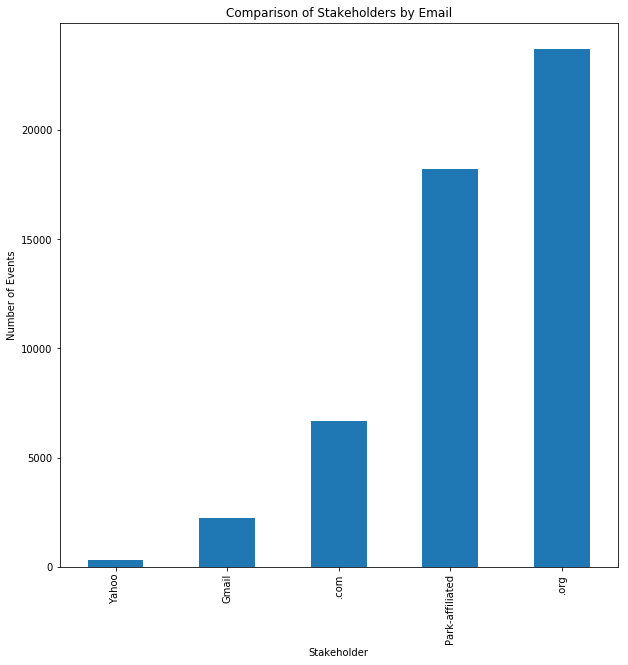

In [723]:
event2['orgtype'].value_counts().sort_values().plot(kind='bar')
plt.title('Comparison of Stakeholders by Email')
plt.ylabel('Number of Events')
plt.xlabel('Stakeholder')
fig= plt.gcf()
fig.set_size_inches(10,10)
plt.savefig(join(graph_path,'stakeholders.pdf'))

In [712]:
event2['email'].value_counts()

                                                             23696
bpc@urbanmgt.com                                              4772
Lucy.Aponte@parks.nyc.gov                                     4149
tours@centralparknyc.org                                      3104
info@cityparksfoundation.org                                  1310
artandantiquities@parks.nyc.gov                               1307
info@prospectpark.org                                         1275
info@FortTryonParkTrust.org                                   1221
francis.gessner@parks.nyc.gov                                 1021
naturecenter@sigreenbelt.org                                   944
summeronthehudson@gmail.com                                    804
sports@cityparksfoundation.org                                 716
rforlenza@queensbotanical.org                                  654
jules.webster@parks.nyc.gov                                    614
zhen.heinemann@parks.nyc.gov                                  

In [650]:
y.head()

,park_id,eventfreq,cost_free,weekday,weekend
0,B001,2,2,1,1
1,B002,16,16,6,10
2,B003,51,47,24,27
3,B007,7,7,6,1
4,B008,34,34,18,16


In [651]:
parkevents['park_id']=parkevents['GISPROPNUM']

In [652]:
y= pd.merge(y,parkevents[['categscore','park_id']],on='park_id')

In [653]:
y.index=y['park_id']

In [654]:
y.head()

,park_id,eventfreq,cost_free,weekday,weekend,categscore
park_id,,,,,,
B001,B001,2,2,1,1,2
B002,B002,16,16,6,10,3
B003,B003,51,47,24,27,0
B007,B007,7,7,6,1,0
B008,B008,34,34,18,16,3


In [655]:
y.reset_index(level=0,drop=True,inplace=True)

In [656]:
y.head()

,park_id,eventfreq,cost_free,weekday,weekend,categscore
0,B001,2,2,1,1,2
1,B002,16,16,6,10,3
2,B003,51,47,24,27,0
3,B007,7,7,6,1,0
4,B008,34,34,18,16,3


In [657]:
parkevents.shape

(751, 23)

In [658]:
event2[event2['park_id']=='M290'] #Not every park has events

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,...,long,address,zip,borough,accessible,geometry,dow,weekend,weekday,orgtype


In [659]:
eventtracts= parktractint.merge(parkevents,on='park_id',how='left').sort_values('eventfreq',ascending=False)
#This method will create duplicate values because it's joining parks to tracts to events... 
#rather than scoring tracts on their own.

In [660]:
eventtracts.set_index(['GISPROPNUM_x','CT2010'],inplace=True)

In [661]:
path=r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\Tracts with Event Frq"

In [662]:
eventtracts2= eventtracts[['CTLabel',\
            'BOROUGH_x','NTACode','COMMUNITYB_y',\
             'COUNCILDIS_y','ACRES_y','SIGNNAME_y',\
             'TYPECATEGO_y','WATERFRONT_y','eventfreq']]

In [663]:
eventtracts.head() #Dataframe with park, corresponding census tracts --> to be joined to census information.

LOCATION_x  \
GISPROPNUM_x CT2010                                             
M010         014500   5 Av To Central Park W, 59 St To 110 St   
             014300   5 Av To Central Park W, 59 St To 110 St   
M008         008400      bet. 5 and 6 Av, W 40 St and W 42 St   
X040         039901  Grand Concourse bet. E. 192 St. and E. K   
X209         030900  W 248 St, Independence Av , W 252 St , P   

                                     COMMUNITYB_x COUNCILDIS_x PRECINCT_x  \
GISPROPNUM_x CT2010                                                         
M010         014500  110, 111, 107, 105, 108, 106            6         18   
             014300  110, 111, 107, 105, 108, 106            6         18   
M008         008400                           105            4         14   
X040         039901                           207           15         52   
X209         030900                           208           11         50   

                               ZIPCODE_x BOROUGH_x  ACRES_x  \
GISPROPNUM_x CT2010                                           
M010         014500  10023, 10024, 10025         M  840.010   
             014300  10023, 10024, 10025         M  840.010   
M008         008400                10018         M    9.603   
X040         039901                10458         X    2.331   
X209         030900                10471         X   20.867   

                                ADDRESS_x    SIGNNAME_x         TYPECATEGO_x  \
GISPROPNUM_x CT2010                                                            
M010         014500         1000 5 AVENUE  Central Park        Flagship Park   
             014300         1000 5 AVENUE  Central Park        Flagship Park   
M008         008400             1060 6 Av   Bryant Park    Neighborhood Park   
X040         039901  2640 GRAND CONCOURSE      Poe Park           Playground   
X209         030900   665 WEST 252 STREET     Wave Hill  Historic House Park   

                     ...    NYS_ASSEMB_y NYS_SENATE_y US_CONGRES_y  \
GISPROPNUM_x CT2010  ...                                             
M010         014500  ...  69, 68, 67, 75           29       10, 13   
             014300  ...  69, 68, 67, 75           29       10, 13   
M008         008400  ...              75           27           12   
X040         039901  ...              78           33           13   
X209         030900  ...              81           34           16   

                                                            geometry_y  \
GISPROPNUM_x CT2010                                                      
M010         014500  (POLYGON ((995951.7570963055 230838.4251838028...   
             014300  (POLYGON ((995951.7570963055 230838.4251838028...   
M008         008400  POLYGON ((988842.0695440471 213608.4097751379,...   
X040         039901  POLYGON ((1013455.227338642 254226.8062284738,...   
X209         030900  POLYGON ((1008599.80594714 265804.3080078065, ...   

                    park_idparks eventfreq  cost_free weekday weekend  \
GISPROPNUM_x CT2010                                                     
M010         014500         M010    6486.0     4468.0  3048.0  3438.0   
             014300         M010    6486.0     4468.0  3048.0  3438.0   
M008         008400         M008    5930.0     5404.0  2818.0  3112.0   
X040         039901         X040    4542.0     4539.0  2218.0  2324.0   
X209         030900         X209    2784.0     1118.0  1349.0  1435.0   

                    categscore  
GISPROPNUM_x CT2010             
M010         014500        3.0  
             014300        3.0  
M008         008400        3.0  
X040         039901        2.0  
X209         030900        0.0  

[5 rows x 52 columns]

In [664]:
y.head()

,park_id,eventfreq,cost_free,weekday,weekend,categscore
0,B001,2,2,1,1,2
1,B002,16,16,6,10,3
2,B003,51,47,24,27,0
3,B007,7,7,6,1,0
4,B008,34,34,18,16,3


In [665]:
eventtracts2.to_csv(join(path,'eventtracts.csv'))
y.to_csv(join(path,'parksevents.csv'))

In [666]:
parks['TYPECATEGO'].value_counts()

Triangle/Plaza                 338
Neighborhood Park              267
Jointly Operated Playground    263
Playground                     240
Community Park                 105
Nature Area                     84
Recreation Field/Courts         71
Strip                           68
Undeveloped                     62
Parkway                         43
Mall                            34
Tracking                        34
Buildings/Institutions          22
Waterfront Facility             18
Flagship Park                   16
Managed Sites                   15
Cemetery                        12
Historic House Park             12
Lot                              5
Name: TYPECATEGO, dtype: int64

Text(0.5, 1.0, 'Parks by Events')

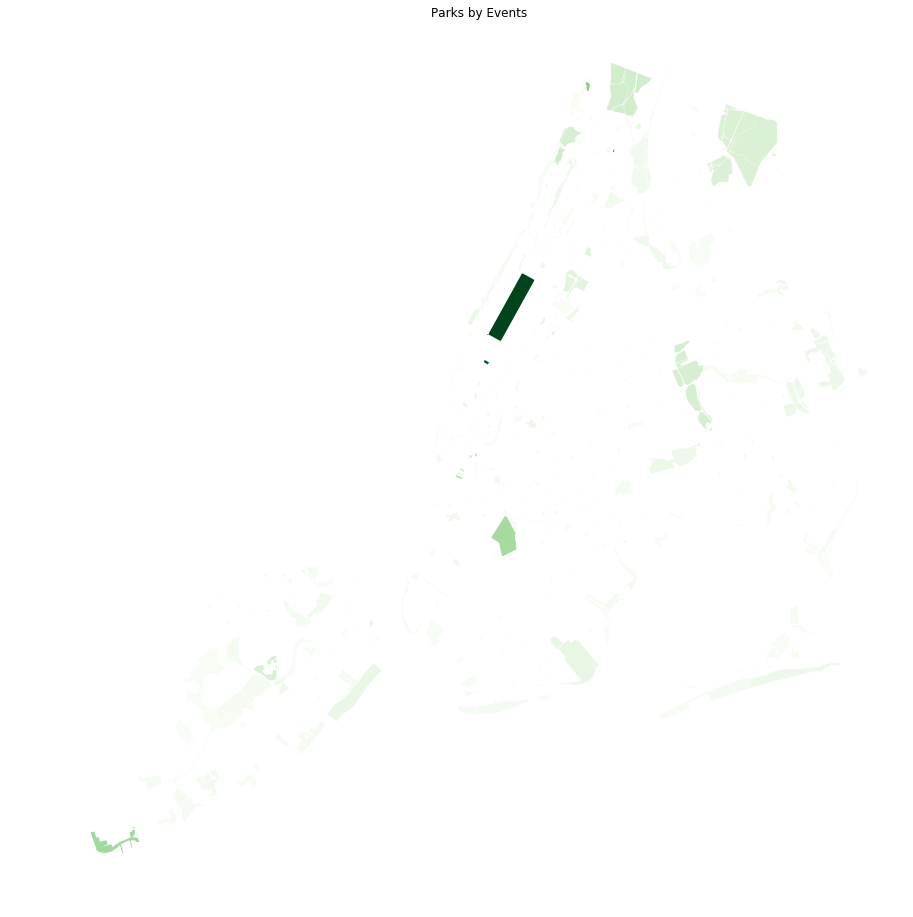

In [675]:
parkevents.plot(column='eventfreq',cmap='Greens',figsize=(16,16))
plt.axis('off')
plt.title('Parks by Events')

Text(0.5, 1.0, 'Parks by Qualitative Score')

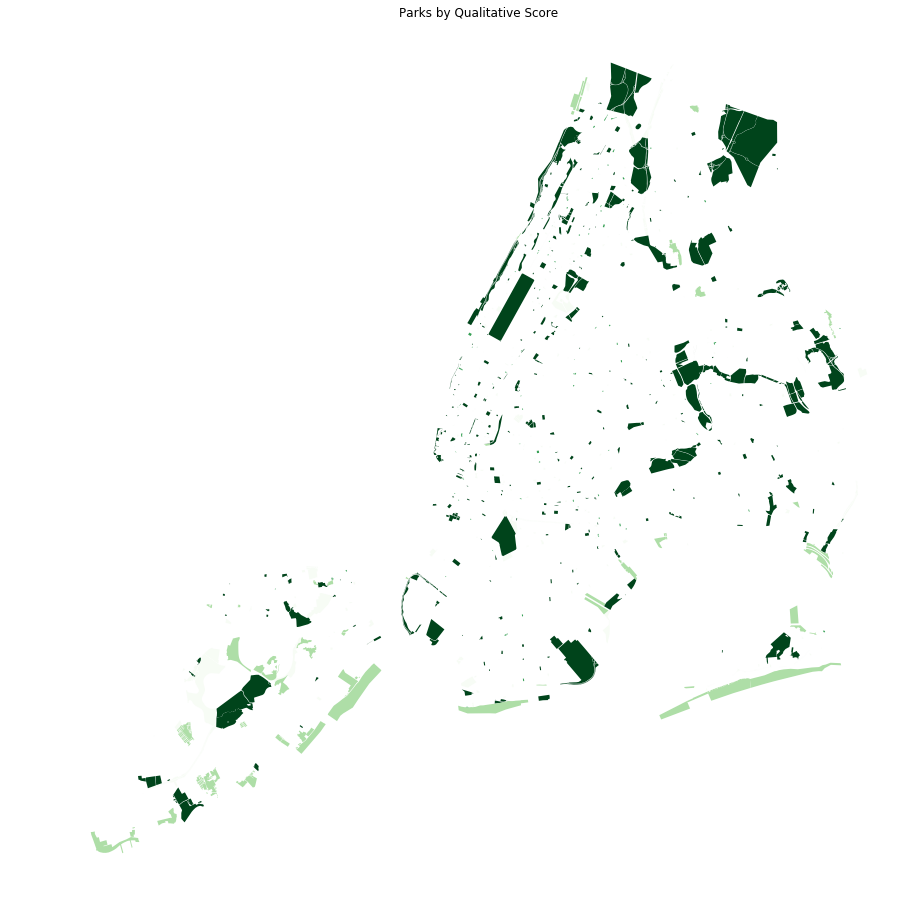

In [676]:
parkevents.plot(column='categscore',cmap='Greens',figsize=(16,16))
plt.axis('off')
plt.title('Parks by Qualitative Score')

Text(0.5, 1.0, 'Parks by Free Events')

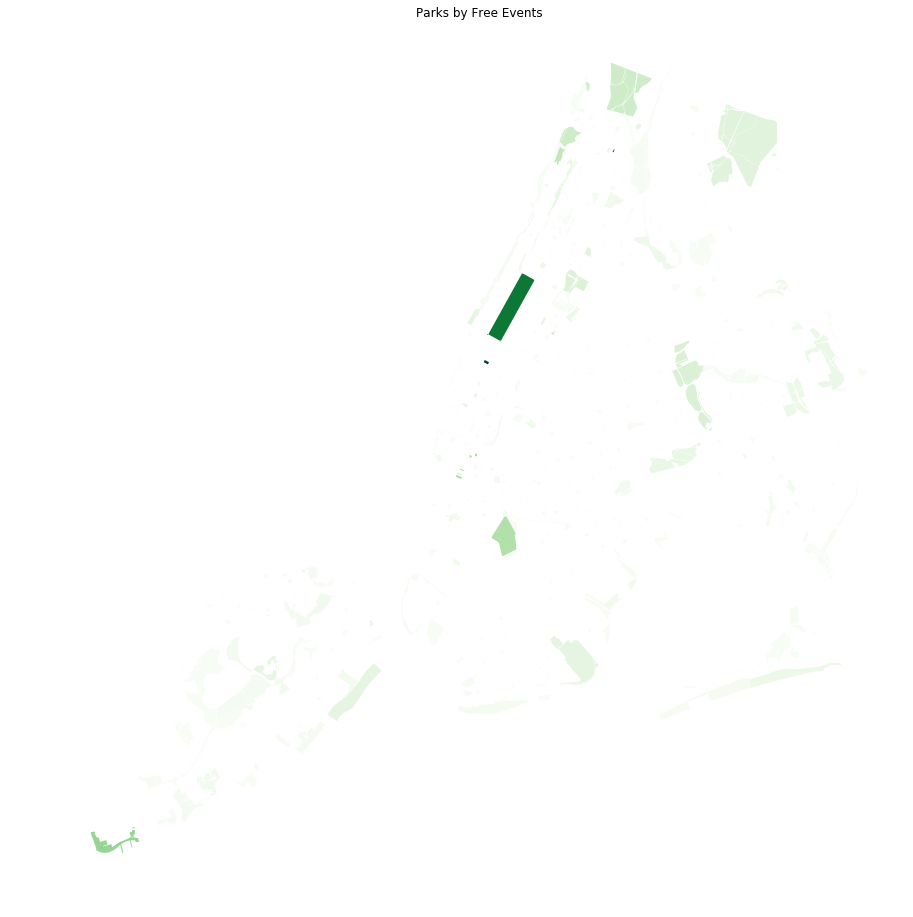

In [682]:
parkevents.plot(column='cost_free',cmap='Greens',figsize=(16,16))
plt.axis('off')
plt.title('Parks by Free Events')

In [680]:
parkevents.head()

,GISPROPNUM,LOCATION,COMMUNITYB,COUNCILDIS,PRECINCT,ZIPCODE,BOROUGH,ACRES,ADDRESS,SIGNNAME,...,NYS_SENATE,US_CONGRES,geometry,park_idparks,park_id,eventfreq,cost_free,weekday,weekend,categscore
1205,B093,Howard Ave. bet. Atlantic Ave. and Herkimer St.,303,41,81,11233,B,0.295,None,Weeksville Playground,...,25,8,"POLYGON ((1006628.274129048 185972.3564515561,...",B093,B093,1,1,0,1,2
280,Q363,Northern Blvd. bet. 93 St. and 94 St.,403,25,115,11372,Q,1.719,93-11 34 AVENUE,Northern Playground,...,13,14,"POLYGON ((1018945.892866477 214562.4866071492,...",Q363,Q363,1,1,1,0,0
1131,R011,"Victory Blvd., Louis St., Howard Ave.",501,49,120,10301,R,3.024,None,Hero Park,...,23,11,"POLYGON ((960117.0078998059 168925.6671198159,...",R011,R011,1,1,1,0,3
1115,X025,Westchester Ave. bet. Virginia Ave. and Metrop...,209,18,43,"10462, 10472",X,1.110,None,Hugh J. Grant Circle,...,32,15,"POLYGON ((1022597.106036469 242893.5300105661,...",X025,X025,1,1,0,1,0
1087,M280,Second Ave. bet. E. 59 St. to E. 60 St.,108,4,19,10022,M,0.448,None,Tramway Plaza,...,28,12,"POLYGON ((994102.4422253817 216424.0629364699,...",M280,M280,1,1,0,1,0


In [700]:
temp= pd.merge(event2,parks,on='park_id',how='left')

In [704]:
temp['TYPECATEGO'].unique()

array(['Flagship Park', 'Playground', 'Community Park',
       'Jointly Operated Playground', nan, 'Waterfront Facility',
       'Nature Area', 'Buildings/Institutions', 'Neighborhood Park',
       'Historic House Park', 'Triangle/Plaza', 'Recreation Field/Courts',
       'Managed Sites', 'Parkway', 'Mall', 'Tracking', 'Cemetery',
       'Undeveloped'], dtype=object)

In [706]:
temp.loc[temp['TYPECATEGO']=='Flagship Park','Type']='Flagship Park'
temp.loc[temp['TYPECATEGO']=='Community Park','Type']='Community Park'
temp.loc[(temp['TYPECATEGO']!='Community Park')&(temp['TYPECATEGO']!='Flagship Park'),'Type']='All Other'

In [703]:
temp.head()

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,...,ACRES,ADDRESS,SIGNNAME,TYPECATEGO,WATERFRONT,NYS_ASSEMB,NYS_SENATE,US_CONGRES,geometry_y,Type
0,76690,Open Hours: Hallett Nature Sanctuary,2013-10-29,13:00,15:00,NaN,Normally closed to visitors except on guided t...,Normally closed to visitors except on guided t...,(212) 360-1461,hlook@centralparknyc.org,...,840.010,1000 5 AVENUE,Central Park,Flagship Park,No,"69, 68, 67, 75",29,"10, 13",(POLYGON ((995951.7570963055 230838.4251838028...,Flagship Park
1,149886,Paper Arts and Crafts,2017-08-19,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,...,2.331,2640 GRAND CONCOURSE,Poe Park,Playground,No,78,33,13,"POLYGON ((1013455.227338642 254226.8062284738,...",
2,143835,It's My Park at Herbert Von King Park - Spring...,2017-04-22,08:00,12:00,NaN,<p>Please note: this event time was originally...,Volunteers will spruce up playground equipment...,(917) 297-2365,wmdkaos@aol.com,...,7.819,None,Herbert Von King Park,Community Park,No,56,25,8,"POLYGON ((999451.2284438014 190366.9500245601,...",
3,162696,Summer on the Hudson: Yoga Flow,2018-08-30,18:30,19:30,NaN,<p>Link mindful breath with movement in this f...,Link mindful breath with movement in this full...,311,summeronthehudson@gmail.com,...,66.693,400 RIVERSIDE DRIVE,Riverside Park South,Community Park,Yes,67,31,10,"POLYGON ((987805.6441234648 223723.124125734, ...",
4,164892,It's My Park at William Sheridan Playground,2018-05-06,10:00,14:00,NaN,"<p>This It&#39;s My Park season, volunteer wit...",Volunteer with Friends of William Sheridan to ...,NaN,delancey.nelson@parks.nyc.gov,...,1.170,289 BERRY STREET,William Sheridan Playground,Jointly Operated Playground,No,50,18,7,"POLYGON ((994336.9420844764 199898.71409747, 9...",
